# Read Data

In [149]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

In [150]:
# read dataset
data = pd.read_csv('car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [151]:
# check duplicate
data.duplicated().sum()

313

In [152]:
# drop duplicate
data = data.drop_duplicates()

In [153]:
# sanity check
data.duplicated().sum()

0

In [154]:
# check missing value
data.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [155]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [156]:
# encode

# replace - with 0 in levy
data['Levy'] = data['Levy'].str.replace('-','0')

# replace doors
data['Doors'] = data['Doors'].str.replace('04-May','4-5')
data['Doors'] = data['Doors'].str.replace('02-Mar','2-3')

# replace mileage
data['Mileage'] = data['Mileage'].str.replace('km','')

<ipython-input-156-b5b75c33ab94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Levy'] = data['Levy'].str.replace('-','0')


In [157]:
# change dtype
data['Levy'] = data['Levy'].astype(int)
data['Mileage'] = data['Mileage'].astype(int)

In [158]:
# rename the columns
data = data.rename(columns={'Prod. year':'Prod_year'})
data = data.rename(columns={'Leather interior':'Leather_interior'})
data = data.rename(columns={'Fuel type':'Fuel_type'})
data = data.rename(columns={'Engine volume':'Engine_volume'})
data = data.rename(columns={'Gear box type':'Gear_box_type'})
data = data.rename(columns={'Drive wheels':'Drive_wheels'})

In [159]:
# grouping the values

# manufactureres
top_manufacturers = ['TOYOTA', 'HYUNDAI', 'MERCEDES-BENZ', 'FORD', 'CHEVROLET']
data['Manufacturer'] = data['Manufacturer'].apply(lambda x: x if x in top_manufacturers else 'Others')

# category
top_category = ['Sedan', 'Jeep', 'Hatchback', 'SUV']
data['Category'] = data['Category'].apply(lambda x: x if x in top_category else 'Others')

# fuel type
top_fuel_type = ['Petrol', 'Diesel', 'Hybrid']
data['Fuel_type'] = data['Fuel_type'].apply(lambda x: x if x in top_fuel_type else 'Others')

# color
top_color = ['Black', 'White', 'Silver']
data['Color'] = data['Color'].apply(lambda x: x if x in top_color else 'Others')

In [160]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod_year         18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather_interior  18924 non-null  object 
 8   Fuel_type         18924 non-null  object 
 9   Engine_volume     18924 non-null  object 
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear_box_type     18924 non-null  object 
 13  Drive_wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

# EDA

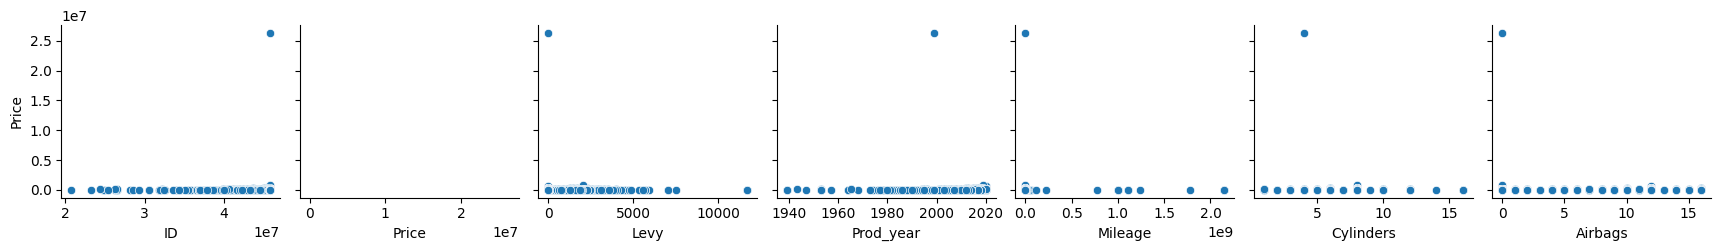

In [161]:
# pair plot
sns.pairplot(data, y_vars="Price")
plt.show()

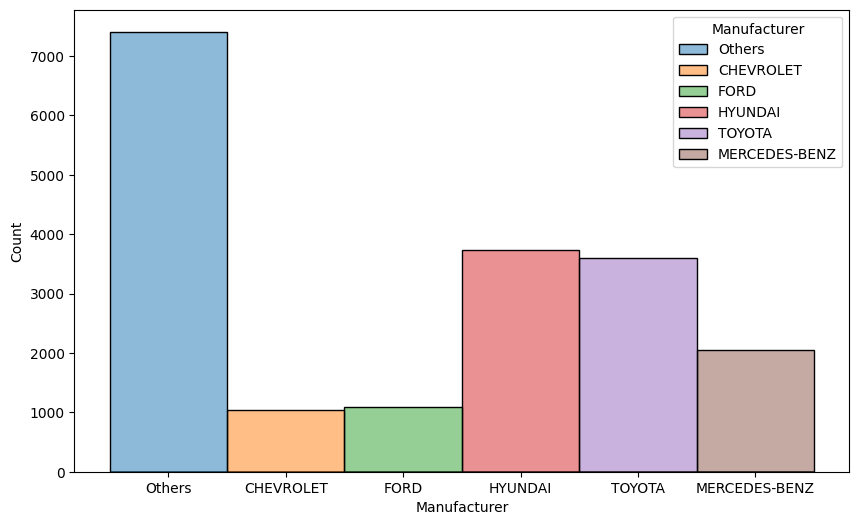

In [162]:
# plot price and manufacturer
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Manufacturer", hue="Manufacturer")
plt.show()

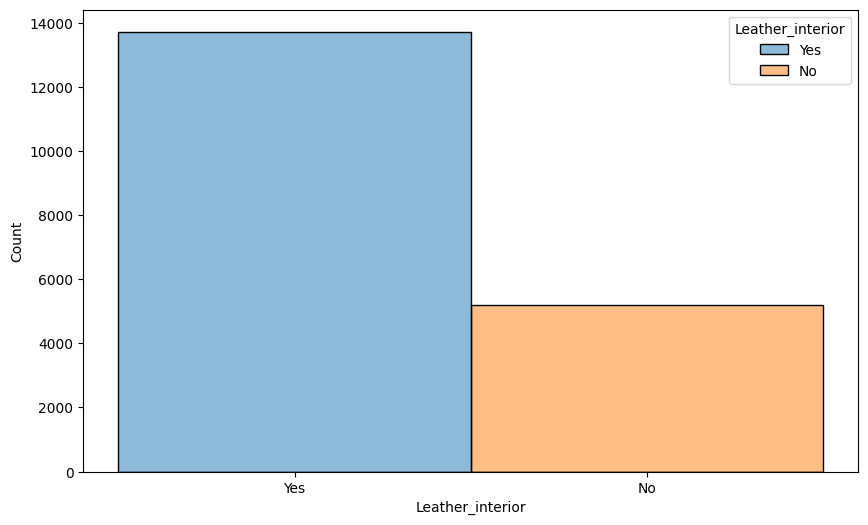

In [163]:
# plot price and leather interior
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Leather_interior", hue="Leather_interior")
plt.show()

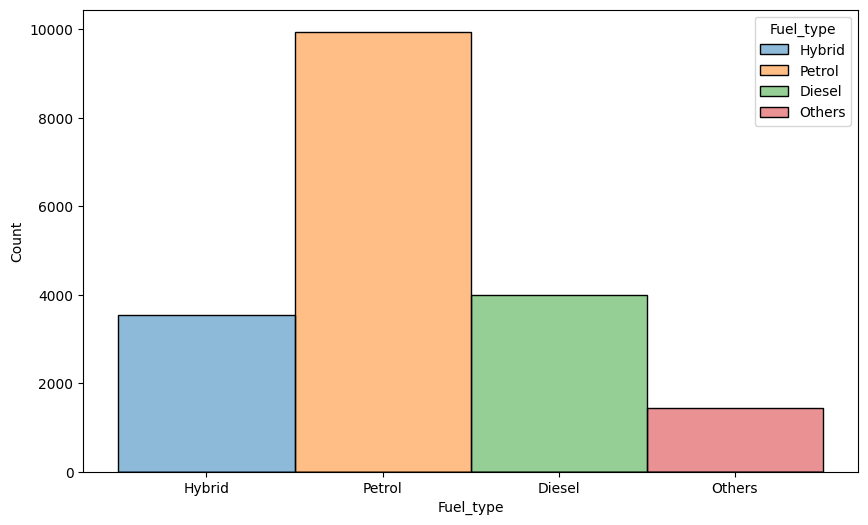

In [164]:
# plot price and fuel type
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Fuel_type", hue="Fuel_type")
plt.show()

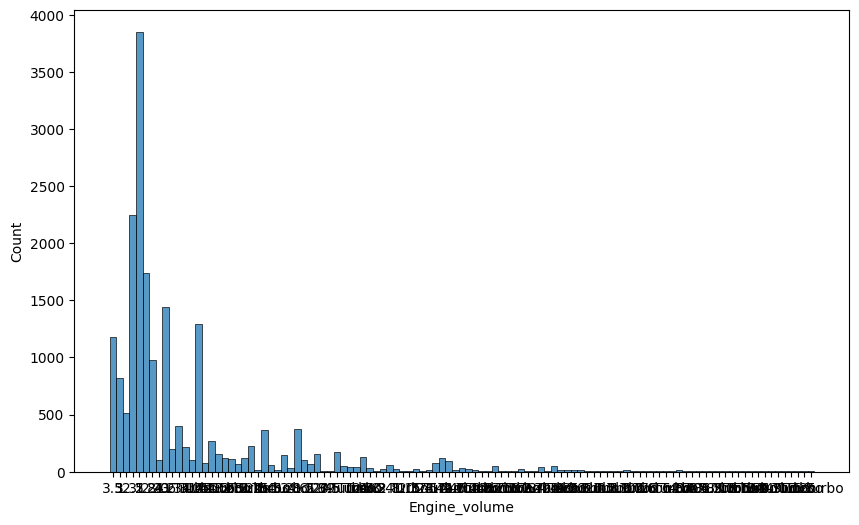

In [165]:
# plot price and Engine volume
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Engine_volume")
plt.show()

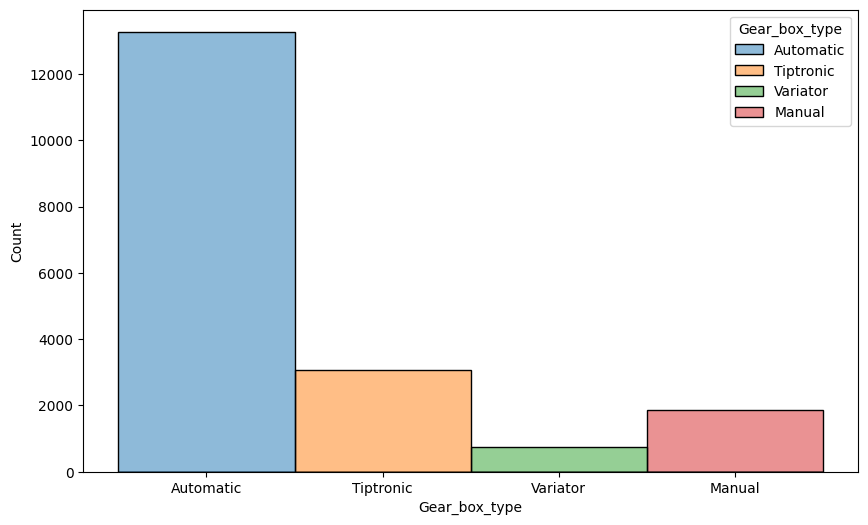

In [166]:
# plot price and Gear box type
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Gear_box_type", hue="Gear_box_type")
plt.show()

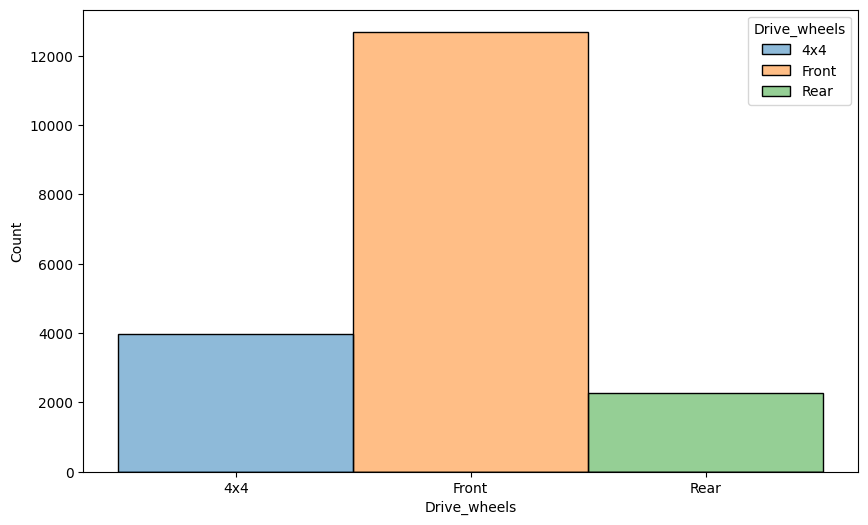

In [167]:
# plot price and Drive wheels
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Drive_wheels", hue="Drive_wheels")
plt.show()

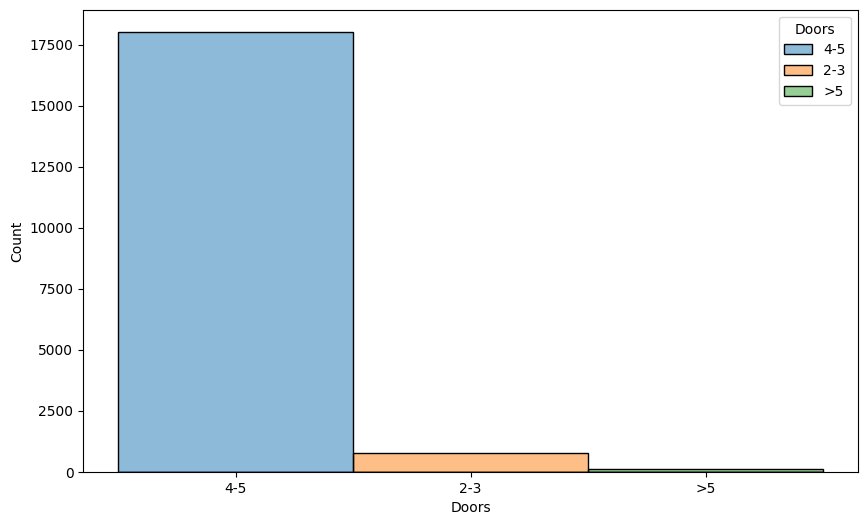

In [168]:
# plot price and Doors
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Doors", hue="Doors")
plt.show()

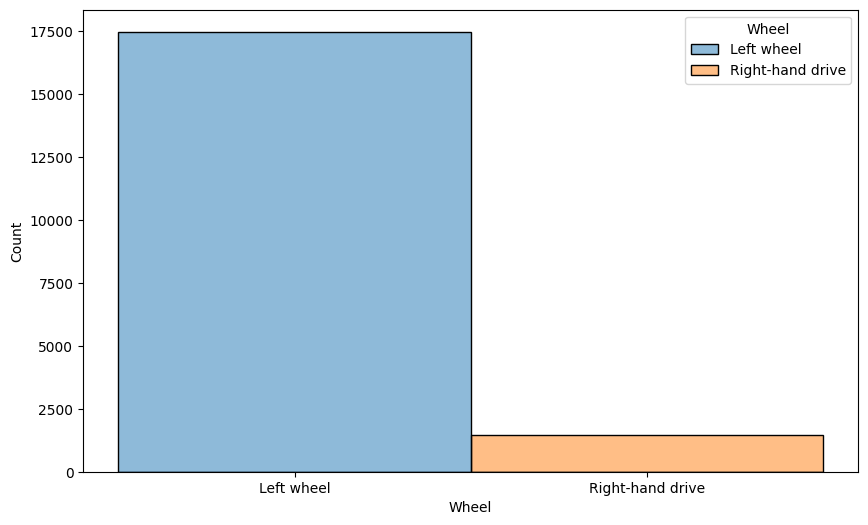

In [169]:
# plot price and Wheel
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Wheel", hue="Wheel")
plt.show()

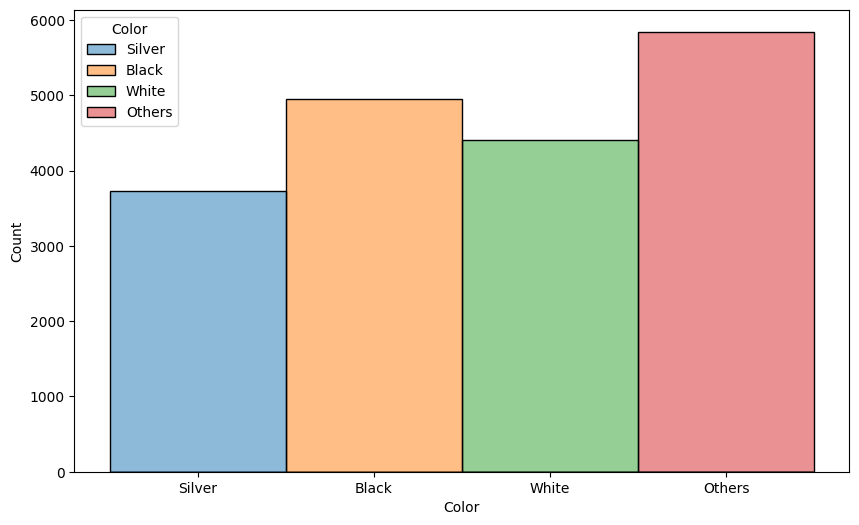

In [170]:
# plot price and color
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x="Color", hue="Color")
plt.show()

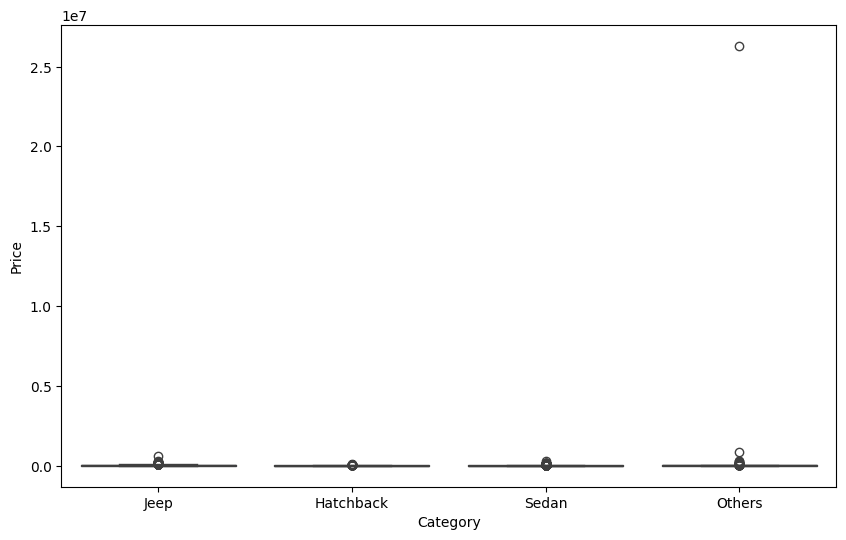

In [171]:
# price and category
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Category", y="Price", data=data)
plt.show()

In [172]:
# IQR
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# check outliers
outliers = data[(data['Price'] < Q1 - 1.5 * IQR) | (data['Price'] > Q3 + 1.5 * IQR)]
len(outliers)

1055

In [173]:
outliers_percentage = 100 * len(outliers) / len(data)
outliers_percentage

5.574931304164025

In [174]:
# remove outliers
data = data.drop(outliers.index)

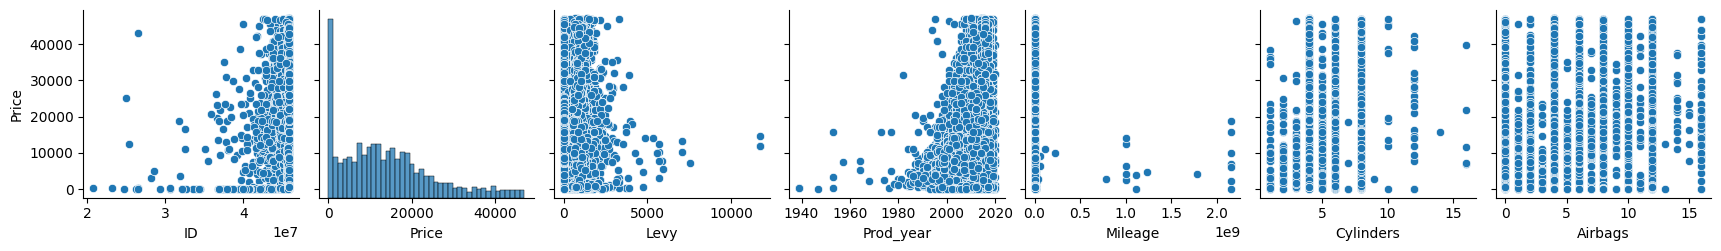

In [175]:
# pair plot untuk Price
sns.pairplot(data, y_vars="Price")
plt.show()

In [176]:
data_corr = data.copy()

In [177]:
data_corr.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,Others,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,45774419,8467,0,Others,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,45809263,11726,446,Others,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4


In [178]:
from sklearn.preprocessing import LabelEncoder

# encode manufacturer group jadi numerik
le = LabelEncoder()
data_corr['Manufacturer'] = le.fit_transform(data_corr['Manufacturer'])

# encode Category
data_corr['Category'] = le.fit_transform(data_corr['Category'])

# encode Fuel_type
data_corr['Fuel_type'] = le.fit_transform(data_corr['Fuel_type'])

# encode Color
data_corr['Color'] = le.fit_transform(data_corr['Color'])

# encode Leather_interior
data_corr['Leather_interior'] = le.fit_transform(data_corr['Leather_interior'])

# encode Gear_box_type
data_corr['Gear_box_type'] = le.fit_transform(data_corr['Gear_box_type'])

# encode Drive_wheels
data_corr['Drive_wheels'] = le.fit_transform(data_corr['Drive_wheels'])

# encode Doors
data_corr['Doors'] = le.fit_transform(data_corr['Doors'])

# encode Wheel
data_corr['Wheel'] = le.fit_transform(data_corr['Wheel'])

In [179]:
data_corr.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,4,RX 450,2010,1,1,1,3.5,186005,6.0,0,0,1,0,2,12
1,44731507,16621,1018,0,Equinox,2011,1,0,3,3,192000,6.0,2,0,1,0,0,8
2,45774419,8467,0,4,FIT,2006,0,0,3,1.3,200000,4.0,3,1,1,1,0,2
3,45769185,3607,862,1,Escape,2011,1,1,1,2.5,168966,4.0,0,0,1,0,3,0
4,45809263,11726,446,4,FIT,2014,0,1,3,1.3,91901,4.0,0,1,1,0,2,4


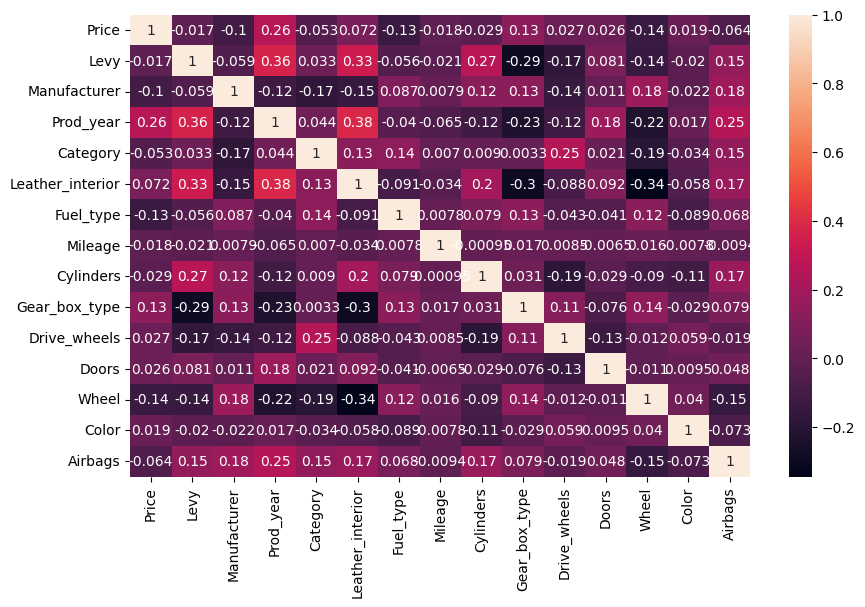

In [180]:
# matrix correlation
fig, ax = plt.subplots(figsize=(10, 6))
corr = data_corr[['Price', 'Levy',	'Manufacturer',	'Prod_year',\
                 'Category',	'Leather_interior',	'Fuel_type',\
                 'Mileage',	'Cylinders',	'Gear_box_type',	'Drive_wheels',\
                 'Doors',	'Wheel',	'Color',	'Airbags']].corr()
sns.heatmap(corr, annot=True)
plt.show()

# Statistical Test

In [181]:
data.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,Others,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12


Define statistical test
- Manufacturer
H0: Harga mobil yang diproduksi oleh TOYOTA sama dengan harga mobil yang di produksi perusahaan lain.
H1: Harga mobil yang diproduksi oleh TOYOTA lebih mahal dibanding harga mobil yang di produksi perusahaan lain.
- Prod_year
H0: Harga mobil yang diproduksi > tahun 2010 sama dengan harga mobil yang diproduksi < tahun 2010.
H1: Harga mobil yang diproduksi > tahun 2010 lebih mahal dibanding harga mobil yang diproduksi < tahun 2010.
- Category
H0: Harga mobil dengan kategori Jeep sama dengan harga mobil kategori selain Jeep.
H1: Harga mobil dengan kategori Jeep lebih mahal dibanding harga mobil kategori selain Jeep.
- Leather_interior
H0: Tidak ada perbedaan harga antara mobil dengan Leather_interior dengan mobil tanpa Leather_interior.
H1: Ada perbedaan perbedaan harga antara mobil dengan Leather_interior dengan mobil tanpa Leather_interior.
- Fuel Type
H0: Harga mobil dengan fuel type Diesel sama dengan harga mobil fuel type selain Diesel.
H1: Harga mobil dengan fuel type Diesel lebih mahal dibandingkan harga mobil fuel type selain Diesel.
- Gear_box_type
H0: Harga mobil dengan tipe gear box Automatic sama dengan harga mobil tipe gear box selain Automatic.
H1: Harga mobil dengan tipe gear box Automatic lebih mahal dibandingkan harga mobil tipe gear box selain Automatic.
- Wheel
H0: Tidak ada perbedaan harga antara mobil dengan left_wheel dengan mobil dengan right_wheel.
H1: Ada perbedaan harga antara mobil dengan left_wheel dengan mobil dengan right_wheel.
- Color
H0: Harga mobil dengan warna hitam sama dengan harga mobil selain warna hitam.
H1: Harga mobil dengan warna hitam lebih mahal dibandingkan harga mobil selain warna hitam.
- Airbags
H0: Harga mobil dengan jumlah airbags setidaknya 6 sama dengan harga mobil sdengan jumlah airbags kurang dari 6.
H1: Harga mobil dengan jumlah airbags setidaknya 6 lebih mahal dibandingkan harga mobil sdengan jumlah airbags kurang dari 6.




In [182]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,Others,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,45774419,8467,0,Others,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,45809263,11726,446,Others,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4


a. Manufacturer

In [183]:
#H0 (Null Hypothesis): The average price of cars produced by TOYOTA is the same as the average price of cars produced by other manufacturers.
#H1 (Alternative Hypothesis): The average price of cars produced by TOYOTA is higher than the average price of cars produced by other manufacturers.

toyota = data[data['Manufacturer'] == 'TOYOTA']['Price']
other = data[data['Manufacturer'] != 'TOYOTA']['Price']

n_toyota = len(toyota)
n_other = len(other)

from scipy import stats

t_stat, p_value = stats.ttest_ind(toyota, other, alternative='greater')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

t-statistic: -7.569809431399546
p-value: 0.9999999999999805
Failed to reject the Null hypothesis


b. Prod year

In [184]:
#H0 (Null Hypothesis): The average price of cars produced after 2010 is the same as the average price of cars produced before 2010.
#H1 (Alternative Hypothesis): The average price of cars produced after 2010 is higher than the average price of cars produced before 2010.

after_2010 = data[data['Prod_year'] > 2010]['Price']
before_2010 = data[data['Prod_year'] <= 2010]['Price']

n_after_2010 = len(after_2010)
n_before_2010 = len(before_2010)

from scipy import stats

t_stat, p_value = stats.ttest_ind(after_2010, before_2010, alternative='greater')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

t-statistic: 27.825556976412564
p-value: 3.7784071875375884e-167
Reject the null hypothesis


c.Category

In [185]:
# H0 (Null Hypothesis): The average price of cars in the Jeep category is the same as the average price of cars in other categories.
# H1 (Alternative Hypothesis): The average price of cars in the Jeep category is higher than the average price of cars in other categories.

jeep = data[data['Category'] == 'Jeep']['Price']
other = data[data['Category'] != 'Jeep']['Price']

n_jeep = len(jeep)
n_other = len(other)

from scipy import stats

t_stat, p_value = stats.ttest_ind(jeep, other, alternative='greater')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

t-statistic: 23.893398358926586
p-value: 1.584443476890459e-124
Reject the null hypothesis


d. Leather_interior

In [186]:
with_leather = data[data['Leather_interior'] == 'Yes']['Price']
without_leather = data[data['Leather_interior'] == 'No']['Price']

n_with_leather = len(with_leather)
n_without_leather = len(without_leather)

from scipy import stats

t_stat, p_value = stats.ttest_ind(with_leather, without_leather)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



t-statistic: 9.715579863389134
p-value: 2.937713191608587e-22
Reject the null hypothesis


e. Fuel Type

In [187]:
#H0 (Null Hypothesis): The average price of cars with Diesel fuel type is the same as the average price of cars with other fuel types.
#H1 (Alternative Hypothesis): The average price of cars with Diesel fuel type is higher than the average price of cars with other fuel types.

diesel = data[data['Fuel_type'] == 'Diesel']['Price']
other = data[data['Fuel_type'] != 'Diesel']['Price']

n_diesel = len(diesel)
n_other = len(other)

from scipy import stats

t_stat, p_value = stats.ttest_ind(diesel, other, alternative='greater')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")


t-statistic: 36.146098438879015
p-value: 1.7378816480403466e-276
Reject the null hypothesis


f. Gear_box_type (Transmission Type)

In [188]:
#H0 (Null Hypothesis): The average price of cars with Automatic transmission is the same as the average price of cars with other transmission types.
#H1 (Alternative Hypothesis): The average price of cars with Automatic transmission is higher than the average price of cars with other transmission types.

automatic = data[data['Gear_box_type'] == 'Automatic']['Price']
other = data[data['Gear_box_type'] != 'Automatic']['Price']

n_automatic = len(automatic)
n_other = len(other)

from scipy import stats

t_stat, p_value = stats.ttest_ind(automatic, other, alternative='greater')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

t-statistic: -12.726110274632475
p-value: 1.0
Failed to reject the Null hypothesis


g. Wheel


In [189]:
# H0 (Null Hypothesis): There is no difference in the average price between cars with left-hand drive and cars with right-hand drive.
# H1 (Alternative Hypothesis): There is a difference in the average price between cars with left-hand drive and cars with right-hand drive.

left_wheel = data[data['Wheel'] == 'Left wheel']['Price']
right_wheel = data[data['Wheel'] == 'Right-hand drive']['Price']

n_left_wheel = len(left_wheel)
n_right_wheel = len(right_wheel)

from scipy import stats

t_stat, p_value = stats.ttest_ind(left_wheel, right_wheel)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")


t-statistic: 18.758841339264393
p-value: 9.154723399389005e-78
Reject the null hypothesis


h. color

In [190]:
#H0 (Null Hypothesis): The average price of cars with black color is the same as the average price of cars with other colors.
#H1 (Alternative Hypothesis): The average price of cars with black color is higher than the average price of cars with other colors.

black = data[data['Color'] == 'Black']['Price']
other = data[data['Color'] != 'Black']['Price']

n_black = len(black)
n_other = len(other)

from scipy import stats

t_stat, p_value = stats.ttest_ind(black, other, alternative='greater')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

t-statistic: 0.26399387410334807
p-value: 0.39589384190932897
Failed to reject the Null hypothesis


i. Airbags

In [191]:
#H0 (Null Hypothesis): The average price of cars with at least 6 airbags is the same as the average price of cars with fewer than 6 airbags.
#H1 (Alternative Hypothesis): The average price of cars with at least 6 airbags is higher than the average price of cars with fewer than 6 airbags.

more_6_airbags = data[data['Airbags'] >= 6]['Price']
less_6_airbags = data[data['Airbags'] < 6]['Price']

n_more_6_airbags = len(more_6_airbags)
n_less_6_airbags = len(less_6_airbags)

from scipy import stats

t_stat, p_value = stats.ttest_ind(more_6_airbags, less_6_airbags, alternative='greater')
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# p-value
alpha = 0.05

# make decision based on p_value test and alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")


t-statistic: -13.453698227718947
p-value: 1.0
Failed to reject the Null hypothesis


# model

In [192]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

model with 1 predictor (based on the highest correlation)

In [193]:
# ols
model = smf.ols("Price ~ Prod_year" , data)

# fit
results_1_pred = model.fit()

# extract
results_car_1 = print_coef_std_err(results_1_pred)
results_car_1

,coef,std err
Intercept,-1.058138e+06,29393.510159
Prod_year,5.332472e+02,14.618794


In [194]:
# r squared
r_squared_1_pred = results_1_pred.rsquared
r_squared_1_pred

0.06930874262700326

multiple predictor, with corr > 10%

In [195]:
# ols
model = smf.ols("Price ~ C(Manufacturer) + Prod_year + C(Fuel_type) + C(Gear_box_type) + C(Wheel)" , data)

# fit
results_5_pred = model.fit()

# extract
results_5 = print_coef_std_err(results_5_pred)
results_5

,coef,std err
Intercept,-1.098797e+06,34211.138190
C(Manufacturer)[T.FORD],3.739319e+02,445.664329
C(Manufacturer)[T.HYUNDAI],4.479874e+03,354.959293
C(Manufacturer)[T.MERCEDES-BENZ],-1.578039e+03,395.417563
C(Manufacturer)[T.Others],1.358839e+03,338.913126
C(Manufacturer)[T.TOYOTA],3.065552e+03,371.826545
C(Fuel_type)[T.Hybrid],-1.166208e+04,283.397586
C(Fuel_type)[T.Others],-8.079119e+03,315.752863
C(Fuel_type)[T.Petrol],-7.704346e+03,208.633578
C(Gear_box_type)[T.Manual],2.256737e+03,308.782051


In [196]:
# r squared
r_squared_results_5_pred = results_5_pred.rsquared
r_squared_results_5_pred

0.24741203065223416

Transform

outcome only

In [197]:
data['logPrice'] = np.log(data['Price'])

In [198]:
# ols
model = smf.ols("logPrice ~ C(Manufacturer) + Prod_year + C(Fuel_type) + C(Gear_box_type) + C(Wheel)" , data)

# fit
results_with_transform_outcome = model.fit()

# extract
results_car = print_coef_std_err(results_with_transform_outcome)
results_car

,coef,std err
Intercept,-58.016504,4.909288
C(Manufacturer)[T.FORD],-0.179870,0.063953
C(Manufacturer)[T.HYUNDAI],0.320407,0.050937
C(Manufacturer)[T.MERCEDES-BENZ],-0.692615,0.056742
C(Manufacturer)[T.Others],-0.233225,0.048634
C(Manufacturer)[T.TOYOTA],0.050822,0.053357
C(Fuel_type)[T.Hybrid],-1.284303,0.040667
C(Fuel_type)[T.Others],-0.386075,0.045310
C(Fuel_type)[T.Petrol],-0.725274,0.029939
C(Gear_box_type)[T.Manual],0.547585,0.044310


In [199]:
# r squared
r_squared_with_transform_outcome = results_with_transform_outcome.rsquared
r_squared_with_transform_outcome

0.1621834390497301

transform in outcome and predictor (Prod_year)

In [200]:
data['logProd_year'] = np.log(data['Prod_year'])

In [201]:
# ols
model = smf.ols("logPrice ~ C(Manufacturer) + logProd_year + C(Fuel_type) + C(Gear_box_type) + C(Wheel)" , data)

# fit
results_with_transform_outcome_predictor = model.fit()

# extract
results_car = print_coef_std_err(results_with_transform_outcome_predictor)
results_car

,coef,std err
Intercept,-501.843379,37.176021
C(Manufacturer)[T.FORD],-0.179961,0.063953
C(Manufacturer)[T.HYUNDAI],0.320429,0.050937
C(Manufacturer)[T.MERCEDES-BENZ],-0.692813,0.056740
C(Manufacturer)[T.Others],-0.233351,0.048633
C(Manufacturer)[T.TOYOTA],0.050758,0.053357
C(Fuel_type)[T.Hybrid],-1.284236,0.040668
C(Fuel_type)[T.Others],-0.385975,0.045312
C(Fuel_type)[T.Petrol],-0.725090,0.029939
C(Gear_box_type)[T.Manual],0.547515,0.044308


In [202]:
# r squared
r_squared_with_transform_outcome_predictor = results_with_transform_outcome_predictor.rsquared
r_squared_with_transform_outcome_predictor

0.16218223163654866

In [203]:
results_5_pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     451.5
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:44:35   Log-Likelihood:            -1.8971e+05
No. Observations:               17869   AIC:                         3.794e+05
Df Residuals:                   17855   BIC:                         3.796e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -1.099e+06   3.42e+04    -32.118      0.000   -1.17e+06   -1.03e+06
C(Manufacturer)[T.FORD]            373.9319    445.664      0.839      0.401    -499.613    1247.477
C(Manufacturer)[T.HYUNDAI]        4479.8744    354.959     12.621      0.000    3784.120    5175.629
C(Manufacturer)[T.MERCEDES-BENZ] -1578.0385    395.418     -3.991      0.000   -2353.095    -802.982
C(Manufacturer)[T.Others]         1358.8390    338.913      4.009      0.000     694.536    2023.142
C(Manufacturer)[T.TOYOTA]         3065.5518    371.827      8.245      0.000    2336.736    3794.368
C(Fuel_type)[T.Hybrid]           -1.166e+04    283.398    -41.151      0.000   -1.22e+04   -1.11e+04
C(Fuel_type)[T.Others]           -8079.1186    315.753    -25.587      0.000   -8698.025   -7460.212
C(Fuel_type)[T.Petrol]           -7704.3461    208.634    -36.928      0.000   -8113.288   -7295.404
C(Gear_box_type)[T.Manual]        2256.7374    308.782      7.309      0.000    1651.495    2861.980
C(Gear_box_type)[T.Tiptronic]     8484.3259    217.328     39.039      0.000    8058.342    8910.310
C(Gear_box_type)[T.Variator]      5635.8177    395.284     14.258      0.000    4861.024    6410.612
C(Wheel)[T.Right-hand drive]     -2436.3114    293.582     -8.299      0.000   -3011.760   -1860.863
Prod_year                          555.2263     16.988     32.683      0.000     521.928     588.525
==============================================================================
Omnibus:                     1351.276   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1715.238
Skew:                           0.695   Prob(JB):                         0.00
Kurtosis:                       3.612   Cond. No.                     9.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

significant

*   Fuel_type
*   Gear_box_type
*   Wheel
*   Prod_year




In [204]:
# ols
model_significant = smf.ols("Price ~ Prod_year + C(Fuel_type) + C(Gear_box_type) + C(Wheel)" , data)

# fit
results_significant = model_significant.fit()

# extract
results_car_significant = print_coef_std_err(results_significant)
results_car_significant

,coef,std err
Intercept,-1.248295e+06,33555.719264
C(Fuel_type)[T.Hybrid],-1.099195e+04,246.587473
C(Fuel_type)[T.Others],-7.029873e+03,316.727694
C(Fuel_type)[T.Petrol],-7.464669e+03,201.537245
C(Gear_box_type)[T.Manual],1.795585e+03,307.042930
C(Gear_box_type)[T.Tiptronic],7.948607e+03,218.419518
C(Gear_box_type)[T.Variator],5.767074e+03,399.071801
C(Wheel)[T.Right-hand drive],-2.421148e+03,294.048274
Prod_year,6.303904e+02,16.672935


In [205]:
# r squared
r_squared_significant = results_significant.rsquared
r_squared_significant

0.22528572438712913

In [206]:
# adjusted r squared
adjusted_r2_significant = 1 - (((1 - r_squared_significant) * (len(data) - 1)) / (len(data) - results_significant.df_model - 1))
adjusted_r2_significant

0.22493870791429016

In [207]:
print(f'r2_1_pred = {r_squared_1_pred}')
print(f'r2_5_pred = {r_squared_results_5_pred}')
print(f'r2_with_transformation_outcome = {r_squared_with_transform_outcome}')
print(f'r2_with_transformation_outcome_and_predictor = {r_squared_with_transform_outcome_predictor}')
print(f'r2_significant = {r_squared_significant}')

r2_1_pred = 0.06930874262700326
r2_5_pred = 0.24741203065223416
r2_with_transformation_outcome = 0.1621834390497301
r2_with_transformation_outcome_and_predictor = 0.16218223163654866
r2_significant = 0.22528572438712913


In [208]:
print(f'r2_1_pred = {r_squared_1_pred}')
print(f'r2_5_pred = {r_squared_results_5_pred}')
print(f'r2_with_transformation_outcome = {r_squared_with_transform_outcome}')
print(f'r2_with_transformation_outcome_and_predictor = {r_squared_with_transform_outcome_predictor}')

r2_1_pred = 0.06930874262700326
r2_5_pred = 0.24741203065223416
r2_with_transformation_outcome = 0.1621834390497301
r2_with_transformation_outcome_and_predictor = 0.16218223163654866


In [209]:
results_5

,coef,std err
Intercept,-1.098797e+06,34211.138190
C(Manufacturer)[T.FORD],3.739319e+02,445.664329
C(Manufacturer)[T.HYUNDAI],4.479874e+03,354.959293
C(Manufacturer)[T.MERCEDES-BENZ],-1.578039e+03,395.417563
C(Manufacturer)[T.Others],1.358839e+03,338.913126
C(Manufacturer)[T.TOYOTA],3.065552e+03,371.826545
C(Fuel_type)[T.Hybrid],-1.166208e+04,283.397586
C(Fuel_type)[T.Others],-8.079119e+03,315.752863
C(Fuel_type)[T.Petrol],-7.704346e+03,208.633578
C(Gear_box_type)[T.Manual],2.256737e+03,308.782051


In [210]:
# centering Prod_year
data['c_Prod_year'] = data['Prod_year'] - data['Prod_year'].mean()

In [211]:
# ols
model = smf.ols("Price ~ C(Manufacturer) + c_Prod_year + C(Fuel_type) + C(Gear_box_type) + C(Wheel)" , data)

# fit
results_5_pred_c = model.fit()

# extract
results_5_c = print_coef_std_err(results_5_pred_c)
results_5_c

,coef,std err
Intercept,17573.663621,347.248760
C(Manufacturer)[T.FORD],373.931859,445.664329
C(Manufacturer)[T.HYUNDAI],4479.874423,354.959293
C(Manufacturer)[T.MERCEDES-BENZ],-1578.038520,395.417563
C(Manufacturer)[T.Others],1358.839035,338.913126
C(Manufacturer)[T.TOYOTA],3065.551763,371.826545
C(Fuel_type)[T.Hybrid],-11662.081114,283.397586
C(Fuel_type)[T.Others],-8079.118643,315.752863
C(Fuel_type)[T.Petrol],-7704.346050,208.633578
C(Gear_box_type)[T.Manual],2256.737380,308.782051


In [212]:
data['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

*  Intercept (17573.66): estimasi rata-rata dari variabel target (harga kendaraan) ketika semua variabel predictor kategorik dalam kategori referensi, dan production year berada di rata-ratanya.



*  Manufacturer:

* FORD (373.93): Kendaraan dari Ford cenderung memiliki harga lebih tinggi sebesar 373.93 dibandingkan dengan manufacturer referensi (chevrolet).
* HYUNDAI (4479.87): Kendaraan Hyundai cenderung memiliki harga lebih tinggi sebesar 4479.87 dibandingkan dengan manufacturer referensi (chevrolet).
* MERCEDES-BENZ (-1578.04): Kendaraan Mercedes-Benz memiliki harga yang lebih rendah sebesar 1578.04 dari dengan manufacturer referensi (chevrolet).
* Others (1358.84): Pabrikan lain (kategori Others) memiliki harga lebih tinggi sebesar 1358.84 dibandingkan dengan manufacturer referensi (chevrolet).
* TOYOTA (3065.55): Kendaraan Toyota memiliki harga lebih tinggi sebesar 3065.55 dibandingkan pabrikan dengan manufacturer referensi (chevrolet).

Fuel_type:
* Hybrid (-11662.08): Kendaraan hybrid cenderung memiliki harga yang lebih rendah sebesar 11662.08 dibandingkan tipe bahan bakar referensi (Diesel).
* Others (-8079.12): Tipe bahan bakar lain cenderung memiliki harga yang lebih rendah sebesar 8079.12 dibandingkan tipe bahan bakar referensi (Diesel).
* Petrol (-7704.35): Kendaraan berbahan bakar bensin memiliki harga yang lebih rendah sebesar 7704.35 dibandingkan tipe bahan bakar referensi (Diesel).

Gear_box_type:

* Manual (2256.74): Transmisi manual meningkatkan harga sebesar 2256.74 dibandingkan transmisi referensi (Automatic).
* Tiptronic (8484.33): Transmisi tiptronic memiliki efek yang sangat positif, menambah harga sebesar 8484.33 dibandingkan transmisi referensi (Automatic).
* Variator (5635.82): Transmisi variator juga meningkatkan harga sebesar 5635.82 dibandingkan transmisi referensi (Automatic).

Wheels:

* Right-hand drive (-2436.31): Kendaraan dengan kemudi di sebelah kanan memiliki harga yang lebih rendah sebesar 2436.31 dibandingkan kendaraan dengan kemudi kiri (kategori referensi).



* c_Prod_year (101.546523): Setiap peningkatan satu unit pada log tahun produksi meningkatkan variabel hasil sebesar 101.5 unit.
